In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


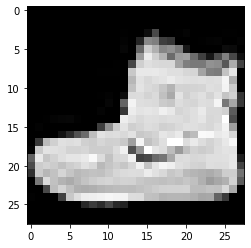

In [5]:
plt.imshow(train_X[0],cmap='gray')
plt.show()

In [0]:
#데이터정규화
train_X=train_X/255.0
test_X=test_X/255.0

In [12]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28,28)),#1차원 데이터로 flatten
                           tf.keras.layers.Dense(units=128,activation='relu'),
                           tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(train_X,train_Y,epochs=25,validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 7s 146us/sample - loss: 0.5301 - accuracy: 0.8159 - val_loss: 0.4203 - val_accuracy: 0.8487
Epoch 2/25
45000/45000 [==============================] - 5s 108us/sample - loss: 0.3933 - accuracy: 0.8595 - val_loss: 0.3912 - val_accuracy: 0.8588
Epoch 3/25
45000/45000 [==============================] - 5s 101us/sample - loss: 0.3540 - accuracy: 0.8700 - val_loss: 0.3523 - val_accuracy: 0.8725
Epoch 4/25
45000/45000 [==============================] - 5s 105us/sample - loss: 0.3268 - accuracy: 0.8820 - val_loss: 0.3521 - val_accuracy: 0.8730
Epoch 5/25
45000/45000 [==============================] - 5s 103us/sample - loss: 0.3078 - accuracy: 0.8875 - val_loss: 0.3237 - val_accuracy: 0.8827
Epoch 6/25
45000/45000 [==============================] - 5s 103us/sample - loss: 0.2904 - accuracy: 0.8918 - val_loss: 0.3427 - val_accuracy: 0.8787
Epoch 7/25
45000/45000 [==========================

<function matplotlib.pyplot.show>

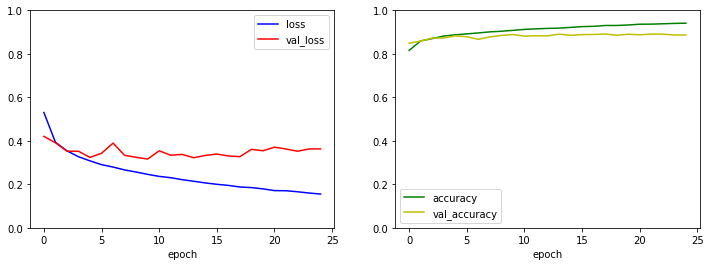

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'y-',label='val_accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()

plt.show

In [16]:
model.evaluate(test_X,test_Y)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3932 - accuracy: 0.8790


[0.3931594438314438, 0.879]